#Logistic regresion:

Links of additional good resources:

  Github of "Python Data Science Handbook": https://github.com/jakevdp/PythonDataScienceHandbook

  Colab version of "Python Data Science Handbook": https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb

  A Colab related to Scikit-Learn: https://colab.research.google.com/github/rugantio/MachineLearningCourse/blob/master/class06_Scikit-Learn.ipynb#scrollTo=9AsDtWyfJJau


## Loading the Wine Data with Scikit-Learn

As an example of a simple dataset, we're going to take a look at the Wine Dataset.
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [ ]:
import numpy as np
from sklearn import datasets

wine_data = datasets.load_wine()

X = wine_data["data"][:, :2] #We are taking only the first 2 features of the dataset
y = (wine_data["target"] == 2).astype(np.int) # 1 if type of wine is of the class 2, else 0

print(X.shape) #We have 178 registries on the dataset
print(y.shape) 

(178, 2)
(178,)


In [ ]:
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X)

X = X_train_minmax
statistic = [np.amax(X_train_minmax), np.amin(X_train_minmax), X.shape]
statistic

[1.0, 0.0, (178, 2)]

## Split Dataset into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state = 42)

## Deffinitions and the class to predict, calculate the loss and train the logistic model

In [ ]:

def _sigmoid(z):
    return 1.0/(1 + np.exp(-(z)))

def _loss(y, y_hat):
    #epsilon = 0.000000000001 #0.000 000 000 001
    loss = -np.mean(y * (np.log(y_hat)) + (1 - y) * np.log(1 - y_hat))# + epsilon))
    #print("loss")
    #print(loss)
    return loss


class LogisticReg:
    
    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    # training step
    def fit(self, X, y, debug = False):
        
        # m is the size of samples
        # n is the size of features
        m, n = X.shape
        
        self.weights = np.zeros((n, 1))
        self.bias = 0
        
        # for safety
        y = y.reshape(m, 1)
        
        # save the history, for debug information
        losses = list()
        b_list = list()
        w_list = list()
        
        # gradient loop
        for epoch in range(self.epochs):
            
            # calculate prediction
            y_hat = _sigmoid(np.dot(X, self.weights) + self.bias)
            
            # calculate and save current loss
            loss = _loss(y, y_hat)
            losses.append(loss)
            
            # calculate gradient
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum((y_hat - y))
            
            # update parameters
            self.weights = self.weights - self.lr * dw            
            self.bias = self.bias - self.lr * db
            
            # save the parameters
            w_list.append(self.weights)
            b_list.append(self.bias)
            
            # print
            if (debug and epoch % 1000 == 0):
                print(f"epoch: {epoch}, loss: {np.round(loss, 4)}")  #, y_hat: {y_hat[0]}")
                
        return self.weights, self.bias, losses, b_list, w_list    

    # the probability predicted
    def prob_predict(self, X):
        preds = _sigmoid(np.dot(X.T, self.weights) + self.bias)
        return np.array(preds)

    # the class predicted
    def predict(self, X):
        preds = self.prob_predict(X)
        pred_class = [1 if i > 0.5 else 0 for i in preds]
        return np.array(pred_class)



In [ ]:
model = LogisticReg(lr = 0.01, epochs = 100000)
w, b, loss, b_list, w_list = model.fit(X_train, y_train, debug = True)
w, b

epoch: 0, loss: 0.6931
epoch: 1000, loss: 0.5766
epoch: 2000, loss: 0.5527
epoch: 3000, loss: 0.5331
epoch: 4000, loss: 0.5169
epoch: 5000, loss: 0.5034
epoch: 6000, loss: 0.4923
epoch: 7000, loss: 0.4829
epoch: 8000, loss: 0.4751
epoch: 9000, loss: 0.4685
epoch: 10000, loss: 0.4629
epoch: 11000, loss: 0.4581
epoch: 12000, loss: 0.454
epoch: 13000, loss: 0.4505
epoch: 14000, loss: 0.4474
epoch: 15000, loss: 0.4447
epoch: 16000, loss: 0.4424
epoch: 17000, loss: 0.4404
epoch: 18000, loss: 0.4386
epoch: 19000, loss: 0.437
epoch: 20000, loss: 0.4356
epoch: 21000, loss: 0.4344
epoch: 22000, loss: 0.4333
epoch: 23000, loss: 0.4323
epoch: 24000, loss: 0.4314
epoch: 25000, loss: 0.4306
epoch: 26000, loss: 0.4299
epoch: 27000, loss: 0.4293
epoch: 28000, loss: 0.4287
epoch: 29000, loss: 0.4282
epoch: 30000, loss: 0.4277
epoch: 31000, loss: 0.4273
epoch: 32000, loss: 0.4269
epoch: 33000, loss: 0.4265
epoch: 34000, loss: 0.4262
epoch: 35000, loss: 0.4259
epoch: 36000, loss: 0.4256
epoch: 37000, lo

(array([[1.366297  ],
        [6.36112424]]), -3.9438856808084806)

## Plot the loss through the training

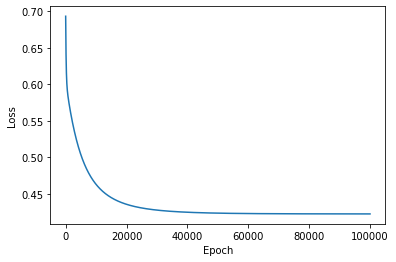

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

##Plot the results

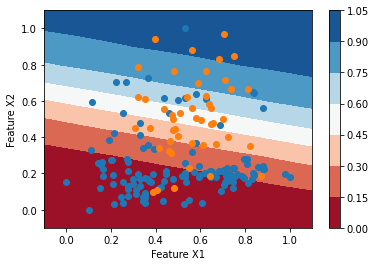

In [ ]:
# probability decision surface for logistic regression on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
  # generate dataset
  #X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-0.1, X[:, 0].max()+0.1
min2, max2 = X[:, 1].min()-0.1, X[:, 1].max()+0.1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
  # define the model
  #model = LogisticRegression()
  # fit the model
  #model.fit(X, y)
# make predictions for the grid
yhat = model.prob_predict(grid.T)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = pyplot.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
pyplot.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
#Names of the axis:
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
# show the plot
pyplot.show()

## Accuracy on test and training sets

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy


print("Accuracy on  test: ", accuracy(y_test, y_hat=model.predict(X_test.T)))

Accuracy on  test:  0.6666666666666666


In [ ]:
print("Accuracy on  train: ", accuracy(y_train, y_hat=model.predict(X_train.T)))

Accuracy on  train:  0.81875


##Confusion Matrix
### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [ ]:
from sklearn import metrics

y_pred = model.predict(X_test.T)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  3],
       [ 3,  1]])

### Visualize CFM (confusion matrix) using a heatmap

Text(0.5, 257.44, 'Predicted label')

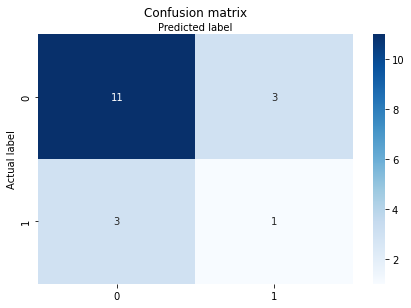

In [ ]:
import seaborn as sns
import pandas as pd

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g') #another color map for confusion matrix: YlGnBu
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Evaluation metrics Accuracy, Precision, Recall

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666


#Now, the logistic regrecion with Scikit-Learn
Example cosidering wine dataset

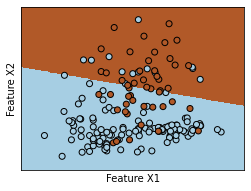

In [ ]:
#Code from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with
wine = datasets.load_wine()#datasets.load_iris()
X = wine.data[:, :2]  # we only take the last two features.
Y = (wine_data["target"] == 2).astype(np.int) # 1 if type of wine is of the class 2, else 0 

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state = 42)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

#"""
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)

#Names of the axis:
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
#"""
#end

##Confusion Matrix, for the Scikit-Learn example
### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [ ]:
from sklearn import metrics

y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  3],
       [ 3,  1]])

### Visualize CFM (confusion matrix) using a heatmap

Text(0.5, 257.44, 'Predicted label')

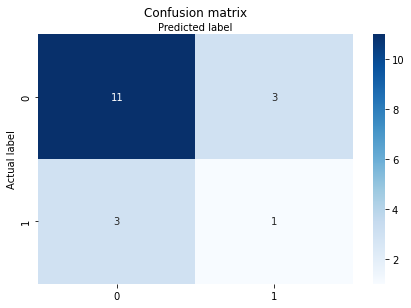

In [ ]:
import seaborn as sns
import pandas as pd

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g') #another color map for confusion matrix: YlGnBu
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Evaluation metrics Accuracy, Precision, Recall

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
